# Описание проекта
Для анализы получены данные интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры.Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. План действий такой: изучить общую информацию по данным, выполнить предобработку данных, выполнить исследовательский анализ данных (выявить зависимости, описать тенденции и т.п.), составить портрет пользователя, проверить гипотезы 

## Загрузка всех библиотек, открытие файла, изучение общей информации

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/datasets/games.csv')
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


1. Таблица состоит из 16715 строк и 11 столбцов.
2. Каждая игра имеет 10 параметров.
3. В столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score и Rating. 
4. Пропусков очень много в столбцах Critic_Score, User_Score и Rating. Скорее всего они вызваны тем, что многие игры впринципе не оценивались, часть еще не оценена и есть наверно данные, которые потерялись. Пропусков в столбцах Name, Year_of_Release, Genre очень мало, скорее всего они случайны. Обработки пропусков будет проведена в следующих разделах.

## Предобработка данных

### 1. Приведение названий столбцов к нижнему регистру

In [2]:
data.columns = data.columns.str.lower()
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()
data[data.duplicated(keep=False)].count()


name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### 2. Работа с пропусками

2.1 Пропуски в столбцах name и genre

In [3]:
data['name'].value_counts()
data.sort_values(by = 'name').tail(2)
data.query('platform == "GEN"')
data.dropna(subset = ['name'], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


1. Всего рассмотрено 11432 игры.
2. Пропуски в name и genre совпадают (относятся к одной игре). 
3. Данные пропуски относятся к играм 1993 года и их всего два, поэтому строки с пропусками удалены.

2.2 Пропуски в столбце year_of_release

In [4]:
non_year = data.query('year_of_release == "NaN"')
ds = []
for row in non_year['name']:
    if '20' in row:
        ds.append(row)
print(ds)
from pymystem3 import Mystem
m = Mystem()
def year(name):
    lemmas = m.lemmatize(name)
    for lemma in lemmas:
        if '20' in lemma and len(lemma) == 4:
            return lemma
data['year_of_release'] = data['year_of_release'].fillna(data['name'].apply(year))
data.dropna(subset = ['year_of_release'], inplace = True)
data['year_of_release'] = data['year_of_release'].astype('int')
data.info()


['madden nfl 2004', 'fifa soccer 2004', 'wwe smackdown vs. raw 2006', 'nascar thunder 2003', 'mlb slugfest 20-03', 'pes 2009: pro evolution soccer', 'madden nfl 2002', 'nfl gameday 2003', 'nba live 2003', 'tomb raider (2013)', 'all-star baseball 2005', 'nba live 2003', 'jet x20', 'all-star baseball 2005', 'tour de france 2011', 'sega rally 2006', 'pdc world championship darts 2008', 'football manager 2007', 'pdc world championship darts 2008']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16461 entries, 0 to 16714
Data columns (total 11 columns):
name               16461 non-null object
platform           16461 non-null object
year_of_release    16461 non-null int64
genre              16461 non-null object
na_sales           16461 non-null float64
eu_sales           16461 non-null float64
jp_sales           16461 non-null float64
other_sales        16461 non-null float64
critic_score       7995 non-null float64
user_score         9851 non-null object
rating             9779 non-nul

1. Всего пропусков в столбце year_of_release - 269.
2. Данные года выпуска возможно восстановить с помощью интернета, но это займет много времени.
3. Пропуски для игр, в названиях которых присутствует год, заменены на этот год, т.к. игры с такими названиями выходят или на год раньше, или в указанный год.
4. Остальные строки с пропусками удалены.
5. Тип данных изменен на целочисленные для удобства дальнейшего использования.

2.3 Пропуски в столбце user_score

В столбце user_score имеются значения tbd. TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований. 

Данные значения, а также пропуски по-возможности заполнены соответствующими значениями столбца critic_score / 10, т.к. в ходе общего анализа данных видно, что оценки критиков и оценки пользователей примерно аналогичны. Также необходимо проверить несколько гипотез по пропускам: зависимость пропусков от продаж, от жанра игры, от платформы.

In [5]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.sort_values(by = 'sum_sales').tail(50)
def nan(row):
    if row != 'tbd':
        return row
data['user_score'] = data['user_score'].apply(nan)
def user(score):
    user_score = score / 10
    return user_score
data['user_score'] = data['user_score'].fillna(data['critic_score'].apply(user))
data['user_score'] = pd.to_numeric(data['user_score'])
data.info()
non_score = data.query('user_score == "Nan"')
non_score['genre'].value_counts()
non_score['platform'].value_counts()
non_score['year_of_release'].value_counts()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 16461 entries, 0 to 16714
Data columns (total 12 columns):
name               16461 non-null object
platform           16461 non-null object
year_of_release    16461 non-null int64
genre              16461 non-null object
na_sales           16461 non-null float64
eu_sales           16461 non-null float64
jp_sales           16461 non-null float64
other_sales        16461 non-null float64
critic_score       7995 non-null float64
user_score         8564 non-null float64
rating             9779 non-null object
sum_sales          16461 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


2010    719
2009    716
2008    647
2011    601
2007    467
2006    364
1998    346
2012    314
2015    305
1999    298
1997    268
2005    263
1996    255
2014    247
2013    239
2016    235
1995    219
2000    202
2002    193
2004    189
2003    173
2001    155
1994    120
1993     60
1981     46
1992     42
1991     41
1982     36
1986     21
1983     17
1989     17
1990     16
1987     16
1988     14
1984     14
1985     13
1980      9
Name: year_of_release, dtype: int64

1. Суммарные продажи во всех регионах добавлены в виде столбца sum_sales.
2. Гипотеза о том, что пропуски есть только в играх с маленькими продажами не подтвердилась.
3. Гипотеза, что пропуски относятся к определенному жанру игры или платформа не подьвердилась.
4. Гипотеза о том, что пропуски относятся к старым играм не подтвердилась.
5. Тип данных изменен на численный

2.4 Пропуски в столбце critic_score

Пропуски в critic_score соответствуют пропускам столбца user_score, поэтому по-возможности они заменены на соответствующие значения столбца user_score * 10

In [6]:
def critic(score):
    critic_score = score * 10
    return critic_score
data['critic_score'] = data['critic_score'].fillna(data['user_score'].apply(critic))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16461 entries, 0 to 16714
Data columns (total 12 columns):
name               16461 non-null object
platform           16461 non-null object
year_of_release    16461 non-null int64
genre              16461 non-null object
na_sales           16461 non-null float64
eu_sales           16461 non-null float64
jp_sales           16461 non-null float64
other_sales        16461 non-null float64
critic_score       8564 non-null float64
user_score         8564 non-null float64
rating             9779 non-null object
sum_sales          16461 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


2.5 Пропуски в столбце rating

Необходимо выполнить проверку принадлежности пропусков к определенным жанрам

In [7]:
genre = data.pivot_table(index='genre', columns='rating', values='year_of_release', aggfunc='count')
genre

rating,AO,E,E10+,EC,K-A,M,RP,T
genre,,,,,,,,
action,1.0,410.0,468.0,1.0,NaN,597.0,NaN,670.0
adventure,NaN,159.0,67.0,2.0,NaN,98.0,NaN,114.0
fighting,NaN,8.0,19.0,NaN,NaN,48.0,NaN,357.0
misc,NaN,449.0,166.0,5.0,1.0,13.0,NaN,228.0
platform,NaN,354.0,141.0,NaN,NaN,3.0,NaN,63.0
puzzle,NaN,284.0,42.0,NaN,NaN,NaN,NaN,10.0
racing,NaN,577.0,95.0,NaN,NaN,18.0,NaN,167.0
role-playing,NaN,83.0,111.0,NaN,NaN,161.0,NaN,415.0
shooter,NaN,47.0,56.0,NaN,NaN,553.0,NaN,340.0


Гипотеза не подтверждена. Оставляем пропуски без изменения

## Исследовательский анализ данных

### 1. Распределение игр по годам выпуска

<font color='green'> Подготовим гисторгамму

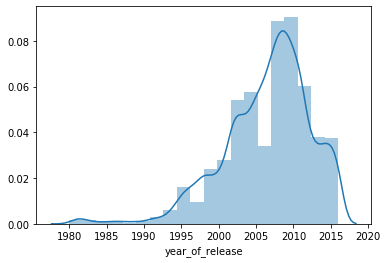

In [8]:
sns.distplot(data['year_of_release'], bins=20);

Анализ количества выпущенных игр по годам показал, что с 1980 по 2002 год выпущено малое количество игр. Данными за эти годы можно пренебречь.

### 2. Анализ платформ. 

Составим сводную таблицу по распределению суммарных продаж по платформам. Для топ-6 платформ построим распределение по годам

,platform,year_of_release
0,ds,11
1,ps,10
2,ps2,12
3,ps3,11
4,wii,11
5,x360,12


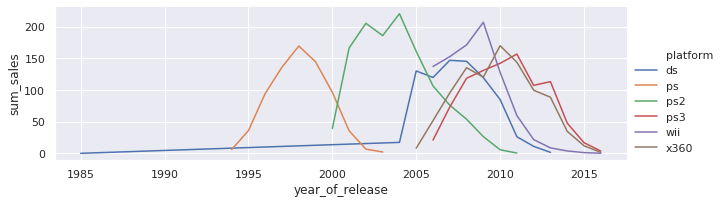

In [9]:
platform = (
    data
    .pivot_table(index=('platform'), values='sum_sales', aggfunc='sum')
    .sort_values(by = 'sum_sales', ascending=False)
)
top_platform = platform.head(6).reset_index()
list_platform = top_platform['platform'].tolist()
year_platform = (
    data
    .query('platform in @list_platform')
    .pivot_table(index=('platform', 'year_of_release'), values='sum_sales', aggfunc='sum')
    .reset_index()
)
sns.set()
a = sns.relplot(x="year_of_release", 
            y="sum_sales", hue="platform", 
            kind="line", height=3, aspect=3, 
            data=year_platform)
duration_platform = (
    year_platform
    .pivot_table(index=('platform'), values='year_of_release', aggfunc='count')
    .reset_index()
)
duration_platform

Распределение показало, что срок жизни платформы в среднем составляет 10 лет. Также это видно из сводной таблицы duration_platform

### 3. Актуальный период.  

За актуальный период примем с 2009 года, т.к. в анализе будут участвовать только актуальные платформы, с большим количеством игр. 

In [10]:
relevant_data = data.query('year_of_release >= 2009')
relevant_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6706 entries, 3 to 16714
Data columns (total 12 columns):
name               6706 non-null object
platform           6706 non-null object
year_of_release    6706 non-null int64
genre              6706 non-null object
na_sales           6706 non-null float64
eu_sales           6706 non-null float64
jp_sales           6706 non-null float64
other_sales        6706 non-null float64
critic_score       3330 non-null float64
user_score         3330 non-null float64
rating             4125 non-null object
sum_sales          6706 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 681.1+ KB


### 4. Анализ платформ за актуальный период

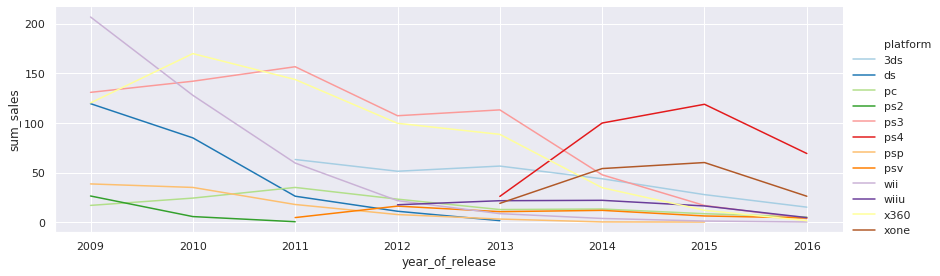

In [11]:
relevant_platform = (
    relevant_data
    .pivot_table(index=('platform', 'year_of_release'), values='sum_sales', aggfunc='sum')
    .reset_index()
)
b = sns.relplot(x="year_of_release", 
            y="sum_sales", hue="platform", 
            kind="line", height=4, aspect=3, 
            data=relevant_platform, palette="Paired")

Анализ актуального периода показал:
1. Если не учитывать 2016 год, то продажи растут у платформ ps4(PlayStation 4) и xone(Xbox One) (они же являются лидерами продаж за 2015 год), также примерно равную динамику показывает платформа wiiu(Wii U) и 3ds (Nintendo 3ds)
2. Остальные платформы падают в продажах.

### 5. Перспективные платформы. 

Рассмотрим 4 наиболее переспективных платформы - ps4(PlayStation 4), xone(Xbox One), wiiu(Wii U) и 3ds (Nintendo 3ds). Диаграмму размаха для данных платформ.

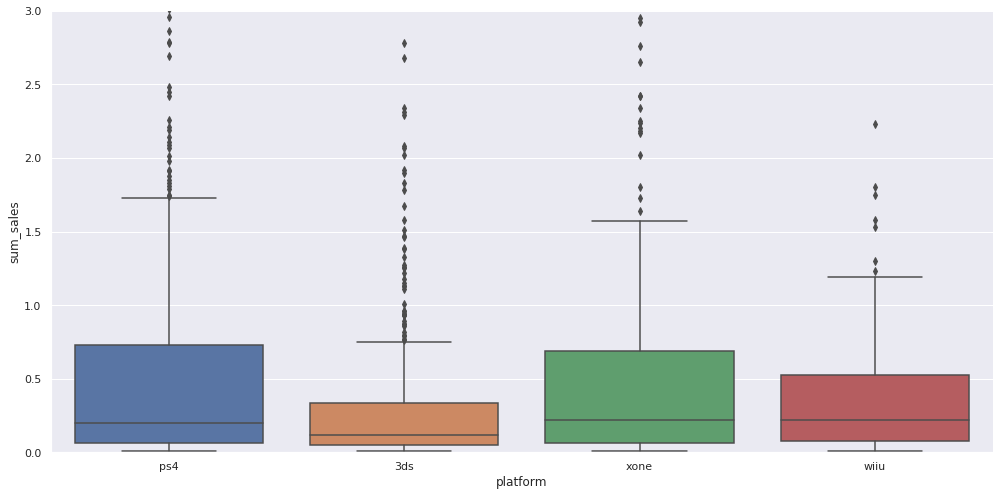

In [12]:
perspective_platform = relevant_data.query('platform in ("ps4", "xone", "wiiu", "3ds")')
c = sns.catplot(x="platform", y="sum_sales",
                data=perspective_platform, kind="box",
                height=7, aspect=2).set(ylim=(0, 3))

Диаграмма размаха показала:
1. Разница в продажах между играми огромная - от 10 тыс. долларов, до 14 млн долларов например для ps4
2. Средние продажи между платформами примерно равны и составляют 100 - 200 тысяч долларов.

### 6. Влияние отзывов. 

Пранализируем влияние отзывов посетителей и критиков на платформе ps4

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


,sum_sales,critic_score,user_score
sum_sales,1.000000,0.400903,-0.032459
critic_score,0.400903,1.000000,0.574627
user_score,-0.032459,0.574627,1.000000


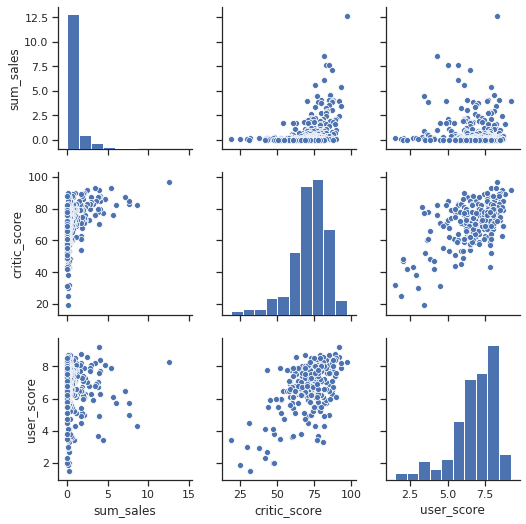

In [13]:
ps4 = relevant_data.query('platform == "ps4"')
sns.set(style="ticks")
d = sns.pairplot(ps4, vars=["sum_sales", "critic_score", "user_score"])
ps4[["sum_sales", "critic_score", "user_score"]].corr()


Анализ показал, что продажи игр в платформе незначительно зависят от оценки критиков и совсем не зависит от оценки пользователей. Здесь можно провести аналогию с киноиндустрией. Кассовые фильмы далеко невсегда имеют высокие оценки. Также и здесь, на продажи больше влияют большие маркетинговые кампании и раскрученность бренда. 

Пранализируем влияние отзывов посетителей и критиков на остальных перспективных платформах

Платформа 3ds

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.321708,0.234523
critic_score,0.321708,1.000000,0.806537
user_score,0.234523,0.806537,1.000000


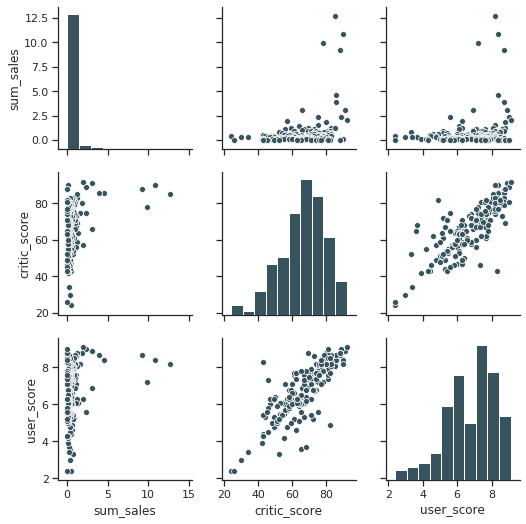

In [14]:
ds = relevant_data.query('platform == "3ds"')
sns.set(style="ticks", palette="GnBu_d")
d = sns.pairplot(ds, vars=["sum_sales", "critic_score", "user_score"])
ds[["sum_sales", "critic_score", "user_score"]].corr()

Платформа xone

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.407171,-0.063838
critic_score,0.407171,1.000000,0.551951
user_score,-0.063838,0.551951,1.000000


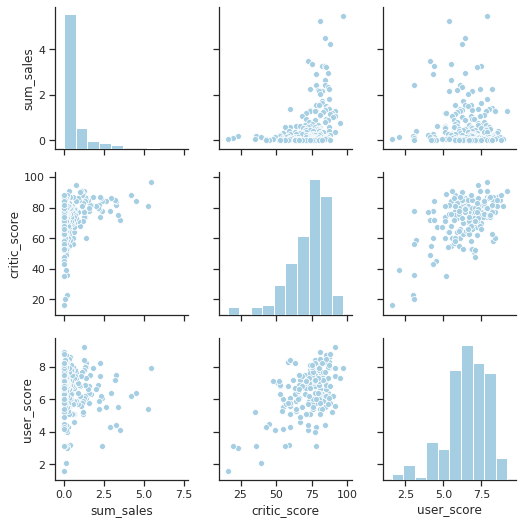

In [15]:
xone = relevant_data.query('platform == "xone"')
sns.set(style="ticks", palette="Paired")
d = sns.pairplot(xone, vars=["sum_sales", "critic_score", "user_score"])
xone[["sum_sales", "critic_score", "user_score"]].corr()

Платформа wiiu

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.362938,0.397402
critic_score,0.362938,1.000000,0.811874
user_score,0.397402,0.811874,1.000000


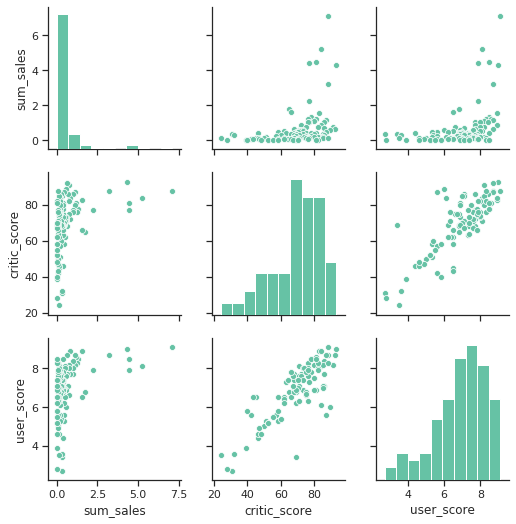

In [16]:
wiiu = relevant_data.query('platform == "wiiu"')
sns.set(style="ticks", palette="Set2")
d = sns.pairplot(wiiu, vars=["sum_sales", "critic_score", "user_score"])
wiiu[["sum_sales", "critic_score", "user_score"]].corr()

Анализ показал, что продажи игр для остальных перспективных платформ также не зависят от оценки  критиков и также совсем не зависит от оценки пользователей.  

### 7. Анализ игр по жанрам 

Проанализируем распределение игр по жанрам. Сделаем сводную таблицу по жанрам

In [17]:
genre_games = (
    relevant_data
    .pivot_table(index='genre', 
                 values='sum_sales', 
                 aggfunc='sum')
    .sort_values(by = 'sum_sales', ascending=False)
    .reset_index()
)
genre_games

,genre,sum_sales
0,action,811.13
1,shooter,549.03
2,sports,466.56
3,role-playing,362.59
4,misc,310.37
5,platform,160.25
6,racing,156.42
7,fighting,113.49
8,simulation,104.67
9,adventure,81.23


Анализ жанров показал, что самыми популярными жанрами являются action, shooter, sports. Жанры с низкими продажами - simulation, adventure, strategy, puzzle. 

## Портрет пользователя для каждого региона

### 1. Популярные платформы

Выделим топ-5 платформ для каждого региона

США

,na_sales,share_sales
platform,,
x360,408.18,0.278420
ps3,291.90,0.199105
wii,235.75,0.160805
ds,120.61,0.082268
ps4,108.74,0.074172


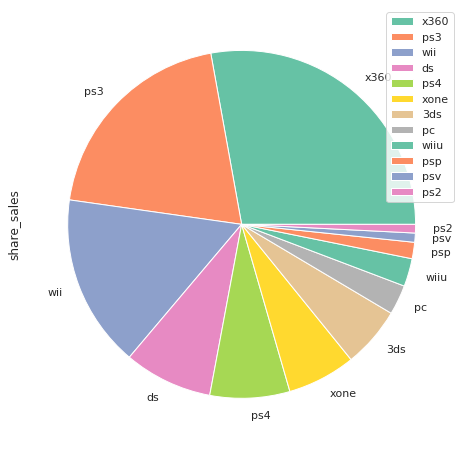

In [18]:
NA_platform = (
   relevant_data
    .pivot_table(index='platform', 
                 values='na_sales', 
                 aggfunc='sum') 
    .sort_values(by = 'na_sales', ascending=False)
)    
NA_platform['share_sales'] = NA_platform['na_sales'] / NA_platform['na_sales'].sum() 
NA_platform.plot(x='platform', y='share_sales', kind='pie', figsize=(8, 8))
NA_platform.head()

Европа

,eu_sales,share_sales
platform,,
ps3,255.00,0.247628
x360,196.76,0.191072
ps4,141.09,0.137011
wii,124.22,0.120629
pc,82.57,0.080183


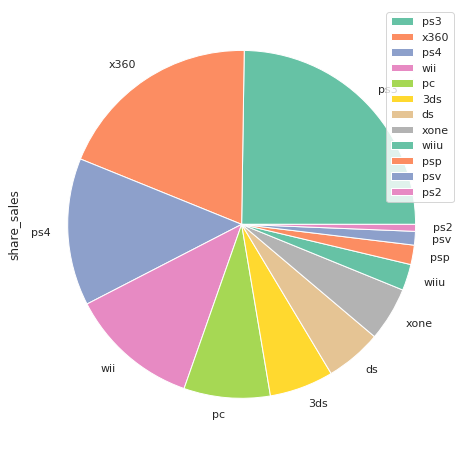

In [19]:
EU_platform = (
   relevant_data
    .pivot_table(index='platform', 
                 values='eu_sales', 
                 aggfunc='sum') 
    .sort_values(by = 'eu_sales', ascending=False)
)
EU_platform['share_sales'] = EU_platform['eu_sales'] / EU_platform['eu_sales'].sum() 
EU_platform.plot(x='platform', y='share_sales', kind='pie', figsize=(8, 8))
EU_platform.head()

Япония

,jp_sales,share_sales
platform,,
3ds,100.62,0.273952
ps3,68.29,0.185929
ds,52.11,0.141877
psp,50.65,0.137902
wii,34.32,0.093441


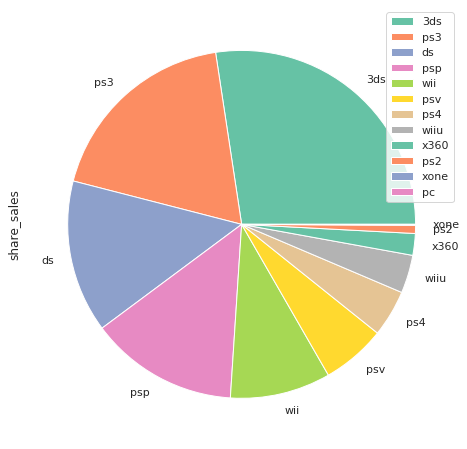

In [20]:
JP_platform = (
   relevant_data
    .pivot_table(index='platform', 
                 values='jp_sales', 
                 aggfunc='sum') 
    .sort_values(by = 'jp_sales', ascending=False)
)
JP_platform['share_sales'] = JP_platform['jp_sales'] / JP_platform['jp_sales'].sum()
JP_platform.plot(x='platform', y='share_sales', kind='pie', figsize=(8, 8))
JP_platform.head()


Анализ показал, что вкусы американцев и европейцев примерно совпадают. Лидерами в этих регионах являются Xbox360 и PlayStation3. Только в Америке популярны больше Xbox360, а в Европе PlayStation3. Возможно это связано с тем, что Xbox производится американской компанией Microsoft, маркетинг которой больше направлен на северо-американскую аудиторию. Компания Sony (производитель  PlayStation) делает больше упор на Европу, поэтому суммарная доля продаж в Европе PlayStation3 и PlayStation4 составляет почти 40 %. Также можно выделить, что в Европе много консерваторов, привыкших играть на компьютерах. Особняком стоит Япония. Там огромную популярность имеет отечественный производитель Nintendo (платформы 3ds, ds, wii). Платформы данного производителя занимают около 50% рынка. Также популярны PlayStation3. Можно отметить,что японца нравится портативная или полупортативная техника, которая может работать без телевизора.

### 2. Популярные жанры

Выделим топ-5 жанров для каждого региона

США

,na_sales,share_sales
genre,,
action,361.78,0.246770
shooter,276.37,0.188512
sports,227.70,0.155314
misc,164.40,0.112137
role-playing,130.83,0.089239


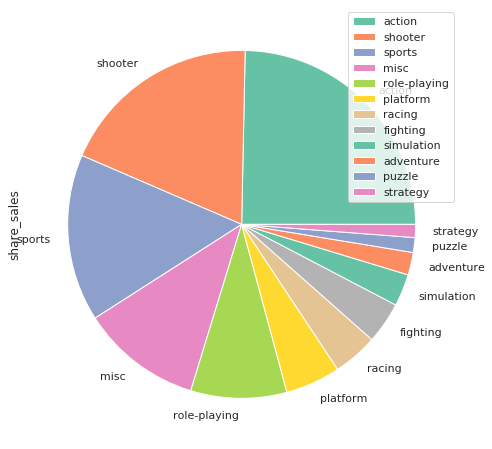

In [21]:
NA_genre = (
   relevant_data
    .pivot_table(index='genre', 
                 values='na_sales', 
                 aggfunc='sum') 
    .sort_values(by = 'na_sales', ascending=False)
)    
NA_genre['share_sales'] = NA_genre['na_sales'] / NA_genre['na_sales'].sum() 
NA_genre.plot(x='genre', y='share_sales', kind='pie', figsize=(8, 8))
NA_genre.head()

Европа

,eu_sales,share_sales
genre,,
action,272.16,0.264292
shooter,192.30,0.186741
sports,158.84,0.154248
misc,86.27,0.083776
role-playing,83.56,0.081144


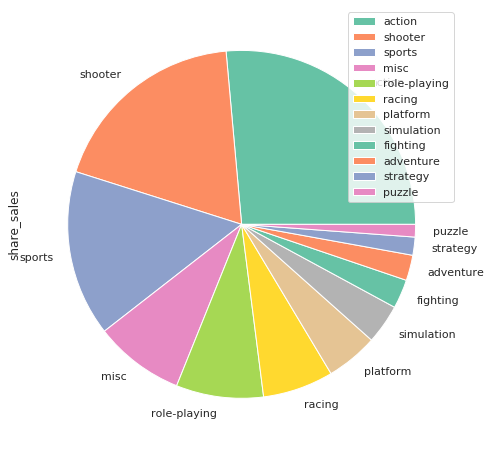

In [22]:
EU_genre = (
   relevant_data
    .pivot_table(index='genre', 
                 values='eu_sales', 
                 aggfunc='sum') 
    .sort_values(by = 'eu_sales', ascending=False)
)    
EU_genre['share_sales'] = EU_genre['eu_sales'] / EU_genre['eu_sales'].sum() 
EU_genre.plot(x='genre', y='share_sales', kind='pie', figsize=(8, 8))
EU_genre.head()

Япония

              jp_sales  share_sales
genre                              
role-playing    120.61     0.328378
action           84.16     0.229138
misc             30.09     0.081924
sports           25.58     0.069645
platform         20.65     0.056223


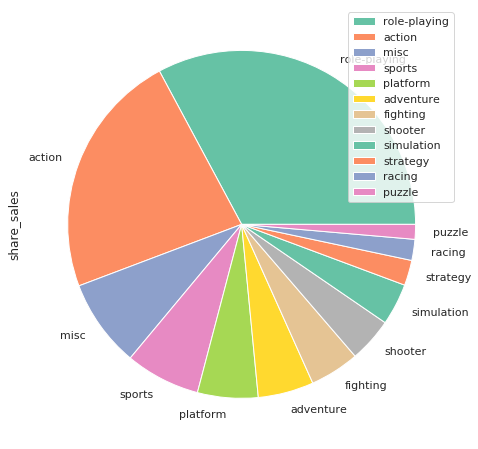

In [23]:
JP_genre = (
   relevant_data
    .pivot_table(index='genre', 
                 values='jp_sales', 
                 aggfunc='sum') 
    .sort_values(by = 'jp_sales', ascending=False)
)    
JP_genre['share_sales'] = JP_genre['jp_sales'] / JP_genre['jp_sales'].sum() 
print(JP_genre.head())
relevant_data.query('genre == "role-playing"').sort_values(by = 'sum_sales').tail()
JP_genre.plot(x='genre', y='share_sales', kind='pie', figsize=(8, 8))


Анализ показал, что и в выборе жанра вкусы американцев и европейцев совпадают. В данном случае совпадают практически абсолютно. Самыми популярными жанрами являются - action, shooter, sports. Также есть потребность в жанрах misc и role-playing. Япония и здесь выделяется своими предпочтениями. На первом месте по популярности стоит жанр role-playing, скорее всего из-за большой популярности японского мультфильма и соответствующей игры pokemon. Далее идет жанр action. Вместе с role-playing они занимают около 55% всего рынка. Также японцам интересны жанры misc, sports, platform, который заменил в топ-5 shooter, наверно японцы более миролюбивы.      

### 3. Влияние возрастного рейтинга

Проанализируем распределение продаж по регионам относительно возрастного рейтинга игр

США

,na_sales,share_sales
rating,,
M,440.92,0.345698
E,403.16,0.316092
T,227.11,0.178063
E10+,202.94,0.159112
EC,1.32,0.001035
RP,0.00,0.000000


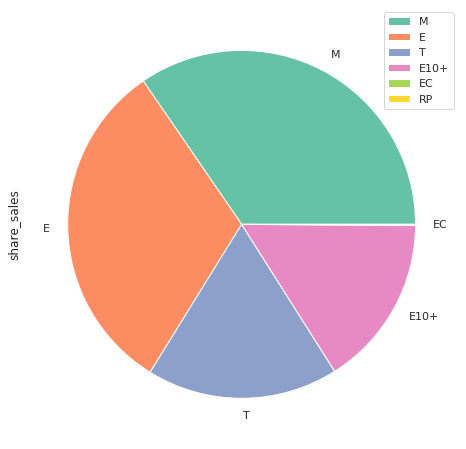

In [24]:
NA_rating = (
   relevant_data
    .pivot_table(index='rating', 
                 values='na_sales', 
                 aggfunc='sum') 
    .sort_values(by = 'na_sales', ascending=False)
)    
NA_rating['share_sales'] = NA_rating['na_sales'] / NA_rating['na_sales'].sum() 
NA_rating.plot(x='rating', y='share_sales', kind='pie', figsize=(8, 8))
NA_rating


Европа

,eu_sales,share_sales
rating,,
M,326.75,0.378538
E,261.50,0.302946
T,153.28,0.177574
E10+,121.63,0.140908
RP,0.03,0.000035
EC,0.00,0.000000


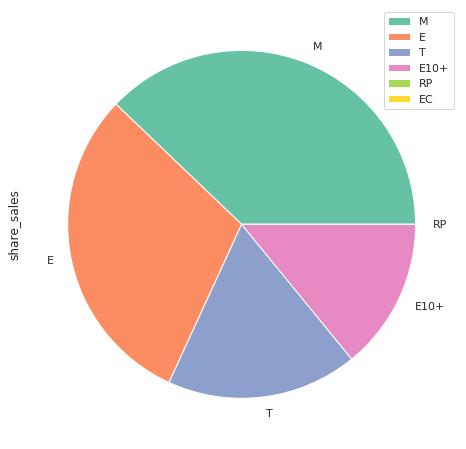

In [25]:
EU_rating = (
   relevant_data
    .pivot_table(index='rating', 
                 values='eu_sales', 
                 aggfunc='sum') 
    .sort_values(by = 'eu_sales', ascending=False)
)    
EU_rating['share_sales'] = EU_rating['eu_sales'] / EU_rating['eu_sales'].sum() 
EU_rating.plot(x='rating', y='share_sales', kind='pie', figsize=(8, 8))
EU_rating

Япония

,jp_sales,share_sales
rating,,
E,61.49,0.364861
T,50.59,0.300184
M,35.63,0.211416
E10+,20.82,0.123539
EC,0.00,0.000000
RP,0.00,0.000000


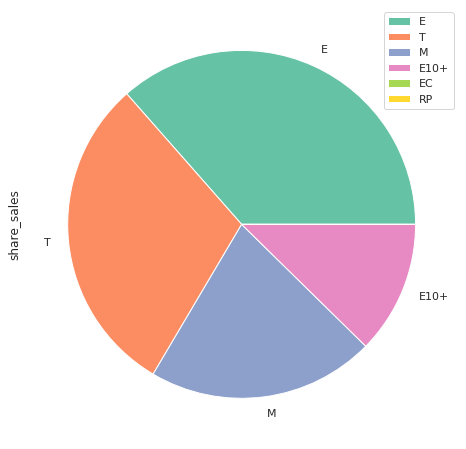

In [26]:
JP_rating = (
   relevant_data
    .pivot_table(index='rating', 
                 values='jp_sales', 
                 aggfunc='sum') 
    .sort_values(by = 'jp_sales', ascending=False)
)    
JP_rating['share_sales'] = JP_rating['jp_sales'] / JP_rating['jp_sales'].sum() 
JP_rating.plot(x='rating', y='share_sales', kind='pie', figsize=(8, 8))
JP_rating

Анализ показал, что в Америке и Европе большим спросом пользуются игры с рейтингом "для взрослых" и "от 6 лет и старше (для всех)". Они занимают больше 60% рынка. Дальше идут игры "для подростков" и "от 10 лет". В Японии же самым популярным рейтингом является "от 6 лет и старше (для всех)" и "для подростков". Игры с рейтингом "для взрослых" занимает 3-е место. Вероятнее всего это связано с тем, что взрослые японцы больше любят работать, чем играть в игры.

## Проверка гипотез

### 1. Гипотеза о равенстве пользовательских рейтингов платформ Xbox One и PC

Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC равны. 
Альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC различается.

In [27]:
data_xone = relevant_data.query('platform == "xone"')
data_pc = relevant_data.query('platform == "pc"')
print('Средняя оценка пользователя Xbox One:', data_xone['user_score'].mean())
print('Средняя оценка пользователя PC:', data_pc['user_score'].mean())
alpha = .05
results = st.ttest_ind(data_xone['user_score'], 
                       data_pc['user_score'], 
                       nan_policy='omit')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средняя оценка пользователя Xbox One: 6.512903225806452
Средняя оценка пользователя PC: 6.656371490280777
p-значение: 0.27086435815809257
Не получилось отвергнуть нулевую гипотезу


Критерием оценки гипотезы служит уровень значимости p-value. Полученный уровень значимости говорит о том, что разница между средними оценками пользователей двух платформ может быть случайна. Следовательно можно сказать, средние пользовательские рейтинги платформ Xbox One и PC равны.

### 2. Гипотеза о разности пользовательских рейтингов жанров Action и Sports

Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports равны. 
Альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports различается.

In [28]:
data_action = relevant_data.query('genre == "action"')
data_sports = relevant_data.query('genre == "sports"')
print('Средняя оценка пользователя жанра Action:', data_action['user_score'].mean())
print('Средняя оценка пользователя жанра Sports:', data_sports['user_score'].mean())
alpha = .05
results = st.ttest_ind(data_action['user_score'], 
                       data_sports['user_score'], 
                       nan_policy='omit')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средняя оценка пользователя жанра Action: 6.743806646525679
Средняя оценка пользователя жанра Sports: 6.052304147465438
p-значение: 7.011389116238035e-16
Отвергаем нулевую гипотезу


Критерием оценки гипотезы служит уровень значимости p-value. Полученный уровень значимости говорит о том, что разница между средними оценками пользователей двух жанров не случайна. Следовательно можно сказать, средний пользовательский рейтинг жанра Action больше жанра Sports.

## Вывод

В результате проведения анализа данных по продажам игр можно сделать следующие выводы:
1. Срок активной жизни платформы составляет 10 лет. Поэтому самыми перспективными платформами на 2016 год являются PlayStation 4 и Xbox One, Wii U и Nintendo 3ds.
2. Оценки пользователей и критиков не влияют на продажи игр.
3. Самыми популярными жанрами в мире являются action, shooter, sports.
4. Для более корректной настройки рекламных кампаний по регионам необходимо учитывать их специфики отдельно. Так как имеются свои нюансы у каждого региона.
5. Для Европы и Америки основной упор нужно делать на платформы PlayStation 4 и Xbox One, жанры action, shooter, sports с возрасной категорией "для взрослых" и "от 6 лет и старше (для всех)".
6. Для Японии - на платформы Wii U и Nintendo 3ds, жанры action и role-playing с возрасной категорией "от 6 лет и старше (для всех)" и "для подростков".